**Analisis Deskriptif Sentimen Tweet Berbahasa Indonesia Berdasarkan Kategorisasi Abusif & Alay**

In [3]:
#importing module

import pandas as pd
import numpy as np
import re #Regex
import string
import matplotlib as plt
import seaborn
import matplotlib.pyplot as plt

In [4]:
#upload data and read it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
DATASET = pd.read_csv ('/content/drive/My Drive/BINAR/data.csv', encoding='latin-1')

In [6]:
Dict1 = pd.read_csv ('/content/drive/My Drive/BINAR/abusive.csv', encoding='latin-1')

In [7]:
Dict2 = pd.read_csv ('/content/drive/My Drive/BINAR/new_kamusalay.csv', encoding='latin-1')


In [8]:
Dict2 = Dict2.rename(columns={'anakjakartaasikasik': 'Original', 'anak jakarta asyik asyik': 'Replacement'})
print(Dict2)

             Original                        Replacement
0        pakcikdahtua                  pak cik sudah tua
1      pakcikmudalagi                  pak cik muda lagi
2         t3tapjokowi                       tetap jokowi
3                  3x                          tiga kali
4              aamiin                               amin
...               ...                                ...
15161       mendikbud  menteri pendidikan dan kebudayaan
15162          mendag                menteri perdagangan
15163         menaker               menteri tenaga kerja
15164        memetwit                            mentwit
15165        megangin                           memegang

[15166 rows x 2 columns]


In [9]:
DATASET

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
DATASET.shape

(13169, 13)

In [11]:
DATASET.head(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
DATASET.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [13]:
DATASET.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

In [14]:
print("Toxic shape: ", DATASET[(DATASET['HS'] == 1) | (DATASET['Abusive'] == 1)].shape)
print("Non-toxic shape: ", DATASET[(DATASET['HS'] == 0) & (DATASET['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [15]:
print("Shape: ", Dict1.shape)
Dict1.head(15)

Shape:  (125, 1)


,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
5,anjir
6,babi
7,bacot
8,bajingan
9,banci


In [16]:
print("Shape: ", Dict2.shape)
Dict2.head(15)

Shape:  (15166, 2)


,Original,Replacement
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
5,aamiinn,amin
6,aamin,amin
7,aammiin,amin
8,abis,habis
9,abisin,habiskan


In [17]:
#Rebuild Missing Data
DATASET.isna().any().sum()

0

In [18]:
#De-Duplicate Data
DATASET.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13164    False
13165    False
13166    False
13167    False
13168    False
Length: 13169, dtype: bool

In [19]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [20]:
DATASET.dtypes

Tweet            object
HS                int64
Abusive           int64
HS_Individual     int64
HS_Group          int64
HS_Religion       int64
HS_Race           int64
HS_Physical       int64
HS_Gender         int64
HS_Other          int64
HS_Weak           int64
HS_Moderate       int64
HS_Strong         int64
dtype: object

In [21]:
DATASET.describe() 

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
DATASET.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [23]:
import string

In [24]:
# rules 1: menghilangkan karakter non-alfanumerik dan membuat semua huruf kecil
def lowercase(text):
    return text.lower()

# rules 2:
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    return text
# rules 3 : mengganti kata-kata yang ada di kamus pertama
def remove_abusive(text):
    text = ' '.join(['' if word in Dict1.ABUSIVE.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text
# rules 4: mengganti kata-kata yang ada di kamus kedua
alay_dict_map = dict(zip(Dict2['Original'], Dict2['Replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
def kecil(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text)
    return text
# rules 5: jadikan seluruh fungsi dalam 1 fungsi
def cleansing(text):
    text = lowercase(text) # rules 1
    text = remove_unnecessary_char(text) # rules 2
    text = remove_abusive(text) # rules 3
    text = normalize_alay(text) # rules 4
    text = kecil(text)
    return text
# end inisialisasi fungsi
DATASET['Tweet'].apply(cleansing)

0         di saat semua cowok berusaha melacak perhatia...
1         siapa yang telat memberi tau eluedan gue berg...
2         kadang aku berfikir kenapa aku tetap percaya ...
3        aku itu akunnku tau matamu tapi dilihat dari m...
4        kaum kafir sudah kelihatan dongoknya dari awal...
                               ...                        
13164    jangan asal berbicara ndasmu kamu yang sekata ...
13165                               kasur mana enak kunyuk
13166                hati hati  gnnlagi bosan duh xfxfxxaa
13167    bom yang real mudah terdeteksi bom yang terkub...
13168         mana situ ngasih itu cuma foto ya kutil onta
Name: Tweet, Length: 13169, dtype: object

In [25]:
cleansing_text_done = DATASET['Tweet'].apply(cleansing)
print(cleansing_text_done)

0         di saat semua cowok berusaha melacak perhatia...
1         siapa yang telat memberi tau eluedan gue berg...
2         kadang aku berfikir kenapa aku tetap percaya ...
3        aku itu akunnku tau matamu tapi dilihat dari m...
4        kaum kafir sudah kelihatan dongoknya dari awal...
                               ...                        
13164    jangan asal berbicara ndasmu kamu yang sekata ...
13165                               kasur mana enak kunyuk
13166                hati hati  gnnlagi bosan duh xfxfxxaa
13167    bom yang real mudah terdeteksi bom yang terkub...
13168         mana situ ngasih itu cuma foto ya kutil onta
Name: Tweet, Length: 13169, dtype: object


In [26]:
DATASET['Clean_Tweet'] = cleansing_text_done
DATASET[['Clean_Tweet']]

,Clean_Tweet
0,di saat semua cowok berusaha melacak perhatia...
1,siapa yang telat memberi tau eluedan gue berg...
2,kadang aku berfikir kenapa aku tetap percaya ...
3,aku itu akunnku tau matamu tapi dilihat dari m...
4,kaum kafir sudah kelihatan dongoknya dari awal...
...,...
13164,jangan asal berbicara ndasmu kamu yang sekata ...
13165,kasur mana enak kunyuk
13166,hati hati gnnlagi bosan duh xfxfxxaa
13167,bom yang real mudah terdeteksi bom yang terkub...


In [27]:
Dict1['label'] = 'Abusive'

In [28]:
Dict1

,ABUSIVE,label
0,alay,Abusive
1,ampas,Abusive
2,buta,Abusive
3,keparat,Abusive
4,anjing,Abusive
...,...,...
120,rezim,Abusive
121,sange,Abusive
122,serbet,Abusive
123,sipit,Abusive


In [29]:
dictionary = dict(zip(Dict1['ABUSIVE'], Dict1['label']))
DATASET['label'] = DATASET['Tweet'].apply(lambda x: next((dictionary.get(w, 'Non Abusive') for w in re.findall(r'\b%s\b' % '|'.join(dictionary.keys()), x)), 'Non Abusive'))

In [30]:
DATASET = DATASET[['Tweet','Clean_Tweet','label', 'HS', 'Abusive', 'HS_Individual', 'HS_Group',
       'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other',
       'HS_Weak', 'HS_Moderate', 'HS_Strong']]
DATASET

,Tweet,Clean_Tweet,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatia...,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau eluedan gue berg...,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya ...,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu akunnku tau matamu tapi dilihat dari m...,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum kafir sudah kelihatan dongoknya dari awal...,Abusive,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal berbicara ndasmu kamu yang sekata ...,Abusive,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati gnnlagi bosan duh xfxfxxaa,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
print(Dict1)

         ABUSIVE    label
0           alay  Abusive
1          ampas  Abusive
2           buta  Abusive
3        keparat  Abusive
4         anjing  Abusive
..           ...      ...
120        rezim  Abusive
121        sange  Abusive
122       serbet  Abusive
123        sipit  Abusive
124  transgender  Abusive

[125 rows x 2 columns]


In [41]:
Alay = set(DATASET['Clean_Tweet'].str.split().explode())
kamus_words = set(Dict2['Replacement'])

matching_words = Alay.intersection(kamus_words)

print('Number of Alay Words:', len(matching_words))

Number of Alay Words: 4600


In [43]:
Alay = set(DATASET['Tweet'].str.split().explode())
kamus_words = set(Dict2['Original'])

matching_words = Alay.intersection(kamus_words)

print('Number of Alay Words:', len(matching_words))

Number of Alay Words: 5908


In [46]:
Abusive = set(DATASET['Tweet'].str.split().explode())
kamus_words = set(Dict1['ABUSIVE'])

matching_words = Alay.intersection(kamus_words)

print('Number of Abusive Words:', len(matching_words))

Number of Abusive Words: 114


In [35]:
DATASET['label'].value_counts()

Non Abusive    6889
Abusive        6280
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5bda7b2070>,
 [Text(-0.07983533181052761, 1.0970990473948572, 'Non Abusive'),
  Text(0.07983533181052796, -1.0970990473948572, 'Abusive')])

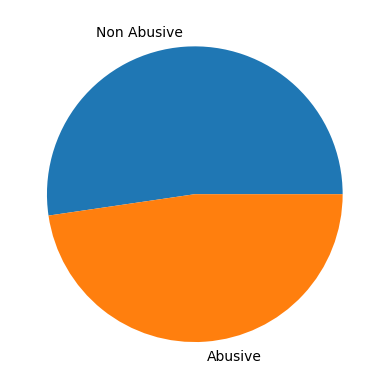

In [36]:
plt.pie(DATASET['label'].value_counts(), labels=DATASET['label'].value_counts().index)

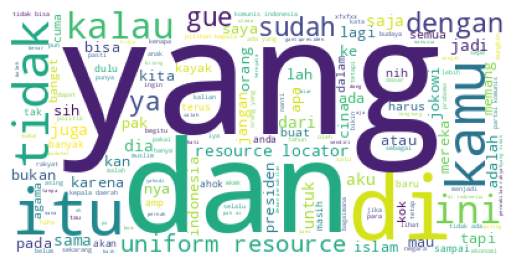

In [45]:
from wordcloud import WordCloud
Dataset = ' '.join(cleansing_text_done)
wordcloud = WordCloud(background_color='white').generate(Dataset)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Tweet', ylabel='Tweet'>

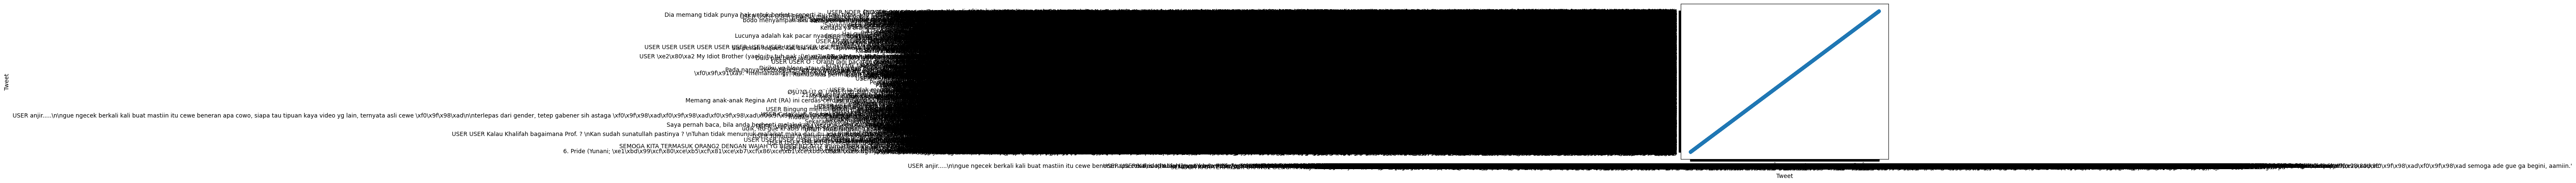

In [47]:
DATASET.plot(x="Tweet", y="Tweet", kind='scatter')